 ## <div align="center"> <span style="font-size:larger; font-weight:bold;" >CLUSTERS PREDICTION USING UNSUPERVISED ML</span></div>  

### PROBLEM STATEMENT:
    In this regression task, I will have to predict the optimum number of clusters in the Data that is given
### DATASET GIVEN:
    A sample data with the six variables, Sepal length; Sepal Width; Petal Length; Petal Width along with the species name given

In [1]:
# Importing the necessary libraries in order to process the data
import numpy as np
import pandas as pd


# Importing libraries to include the visualizations in the Nb
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the warnings, to ignore any unnecessary warning pops up
import warnings
warnings.filterwarnings("ignore")

# Creating a DF to show the version of the modules used here
version = [['Numpy',np.__version__],['Pandas',pd.__version__],['Matplotlib',mpl.__version__],['Seaborn',sns.__version__]]
pack = pd.DataFrame(version,columns=['Package Name','Version'],index=[1,2,3,4])


print("Packages are Imported with the version as follows:")
print("=="*40)
pack

Packages are Imported with the version as follows:


,Package Name,Version
1,Numpy,1.18.1
2,Pandas,1.0.5
3,Matplotlib,3.3.0
4,Seaborn,0.10.0


__Data Loading and check:__

Now the packages are imported in to Nb, we will load and do some kind of EDA on the same


In [2]:
# Loading the dataset from the given url into Nb

iris_df = pd.read_csv("Iris.csv",header=0)
iris_df = iris_df.iloc[:,1:]

In [3]:
# Checking the glimpse of the data loaded

iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


__Data Dimension and Data Type Check:__

Once we are done with the above step, we are going to check the dimensions of the data loaded

In [4]:
# Dimension check

print("This DF has {0} rows and {1} columns in it".format(iris_df.shape[0],iris_df.shape[1]))

This DF has 150 rows and 5 columns in it


In [5]:
# Data types and missing values check

iris_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Lets expand and see the object type variable ___Species___ more clear to find what are all the categorical values available in it

In [6]:
# Expanding and Inspecting Categorical variable

iris_df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

As we see, there are 3 varied categories that this variable has

As expected, scores are in integer format and hours are in floating format

__Statistical Analysis:__

We are yet to find the outliers available in the DF, if any. It can be done by using the describe function with distinct parameters it has

In [7]:
# Statistical figures for the DF loaded

# list of dtypes to include 
include =['object', 'float', 'int']

iris_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99],include=include)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


As far as the above description, we could that there are outliers seen in the dataset, but since it is valid to have the outliers and make sense we are not handling the same.  
As a part of Categorical values, Iris-virginica is the top categorical value with maximum frequency of 50 out of 150 values.  
As a part of outlier detection, we are going to see the boxplots also

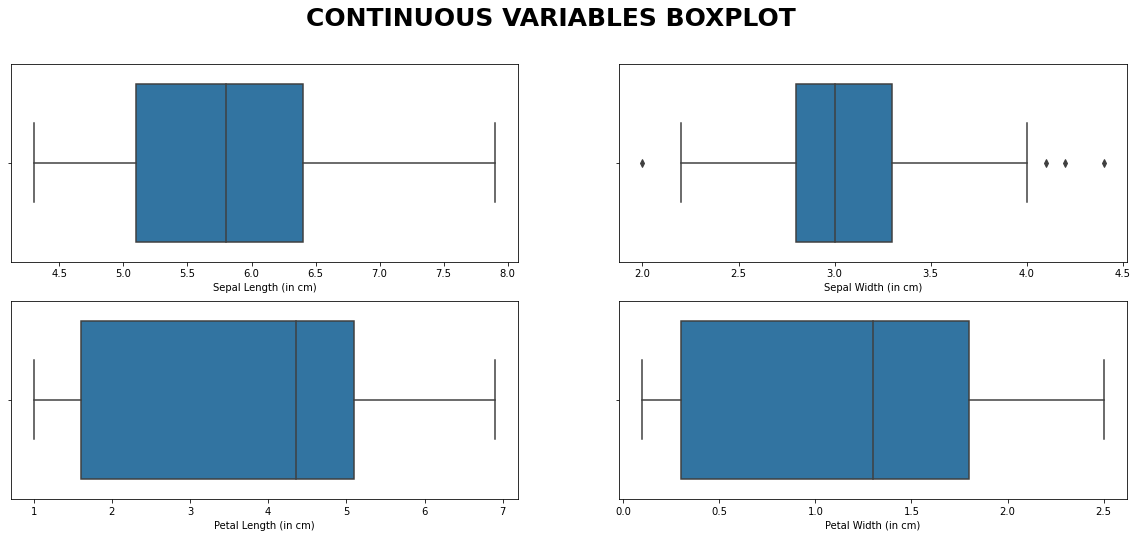

In [8]:
# Plotting all of the continuous variables in a subplot

fig =plt.figure(figsize=(20, 8))
fig.suptitle("continuous variables boxplot".upper(),fontsize=25,weight='bold')

plt.subplot(2,2,1)
sns.boxplot(x = 'SepalLengthCm', data = iris_df)
plt.xlabel('Sepal Length (in cm)')

plt.subplot(2,2,2)
sns.boxplot(x = 'SepalWidthCm', data = iris_df)
plt.xlabel('Sepal Width (in cm)')

plt.subplot(2,2,3)
sns.boxplot(x = 'PetalLengthCm', data = iris_df)
plt.xlabel('Petal Length (in cm)')

plt.subplot(2,2,4)
sns.boxplot(x = 'PetalWidthCm', data = iris_df)
plt.xlabel('Petal Width (in cm)')

plt.show()

___Inferences from the above plot:___

1. Sepal Values with length has mean of 5.8 and spread along 4 till 8 cm, whereas Width has some outliers seen with mean of 3 respectively 
2. Petal Values with length of mean 4.4 and width of 1.3 spread along 0 till 2.5 respectively 

### Exploratory Data Analysis

Lets understand the data more by plotting them against different graphs

___Univariate Analysis Continuous:___

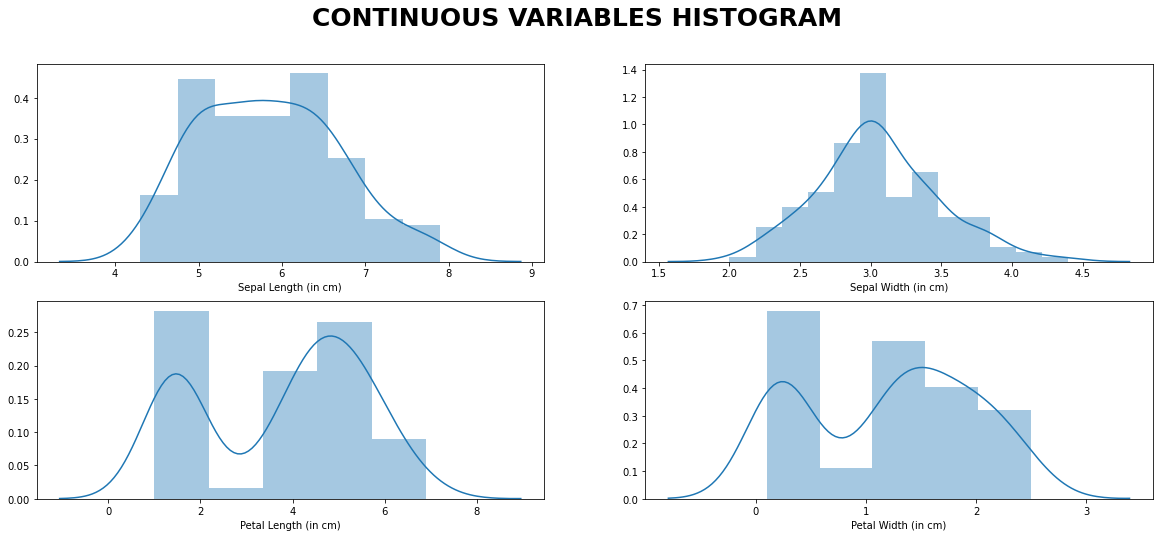

In [9]:
# Lets see the distribution using distplot

fig=plt.figure(figsize=(20, 8))
fig.suptitle("continuous variables histogram".upper(),fontsize=25,weight='bold')

plt.subplot(2,2,1)
sns.distplot(iris_df.SepalLengthCm)
plt.xlabel('Sepal Length (in cm)')

plt.subplot(2,2,2)
sns.distplot(iris_df.SepalWidthCm)
plt.xlabel('Sepal Width (in cm)')

plt.subplot(2,2,3)
sns.distplot(iris_df.PetalLengthCm)
plt.xlabel('Petal Length (in cm)')

plt.subplot(2,2,4)
sns.distplot(iris_df.PetalWidthCm)
plt.xlabel('Petal Width (in cm)')

plt.show()

___Inferences from the above plot:___

1. Sepal Length column has the distribution of non skewed data as it does lean towards either range with wide kurtosis  respectively 
2. Sepal Width columns has strong narrow kurtosis also the distribution of non skewed data is seen.
3. Petal values are not in a normal distribution, as they formed a m-shaped distribution with right skewed curves

___Univariate Analysis Categorical:___

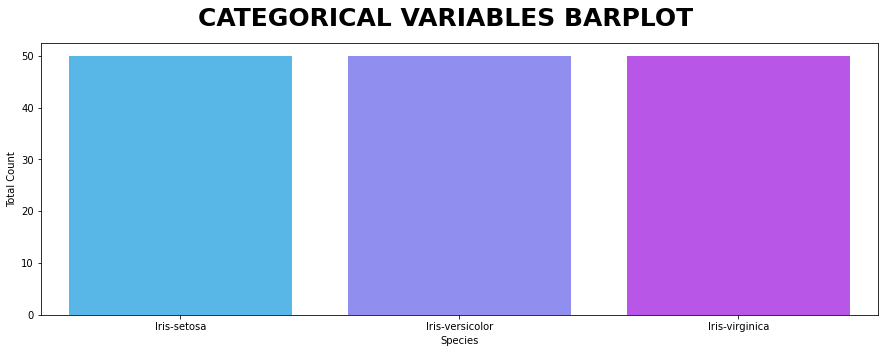

In [10]:
# Lets see the categorical value using barplot

fig = plt.figure(figsize=(15,5))
fig.suptitle("categorical variables barplot".upper(),fontsize=25,weight='bold')
sns.countplot(x="Species", data=iris_df,palette='cool')

plt.xlabel("Species".title())
plt.ylabel('Total Count')
plt.show()

___Inferences from the above plot:___

* All the values from Species seems to have equal amount of values available in the DF with Iris- Virginica as the highest one respectively 


___Bi-Variate Analysis:___

In [11]:
# Defining the function in view of producing more plots to understand the bivariates

def bivariate_con(x,y):
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=x, y=y, data=iris_df,palette='cool')
    plt.suptitle(x.title()+" vs "+y.title())
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.show()

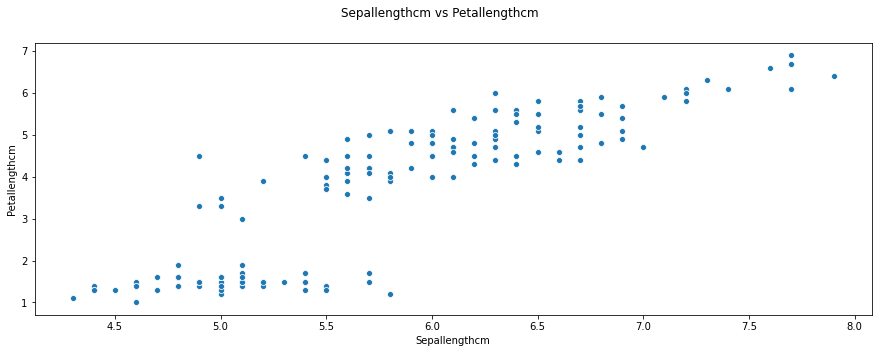

In [12]:
# Passing the distinct values with the created function

bivariate_con(x='SepalLengthCm',y='PetalLengthCm')

___Inferences from the above plot:___

1. These two columns shows a steady increase after some stage with values are proportional to each other
2. The lower model values are clusterred and cluttered, so there was not a particular pattern

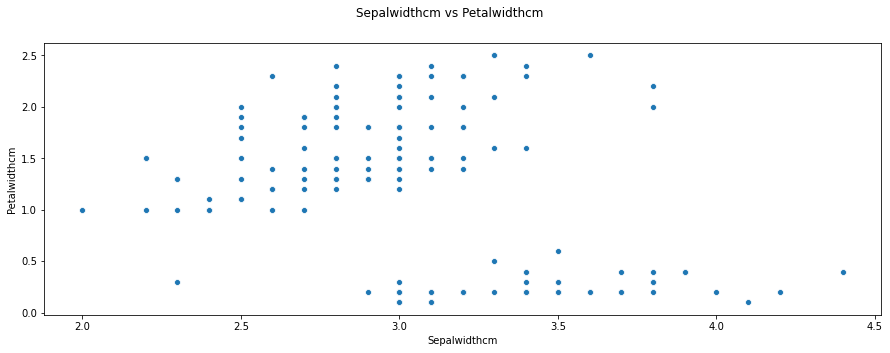

In [13]:
# Passing the distinct values with the created function

bivariate_con(x='SepalWidthCm',y='PetalWidthCm')

___Inferences from the above plot:___

1. These two columns shows a steady increase after some stage with values are proportional to each other
2. The lower later model values are clusterred and cluttered, so there was not a particular pattern

___Multi-Variate Analysis:___

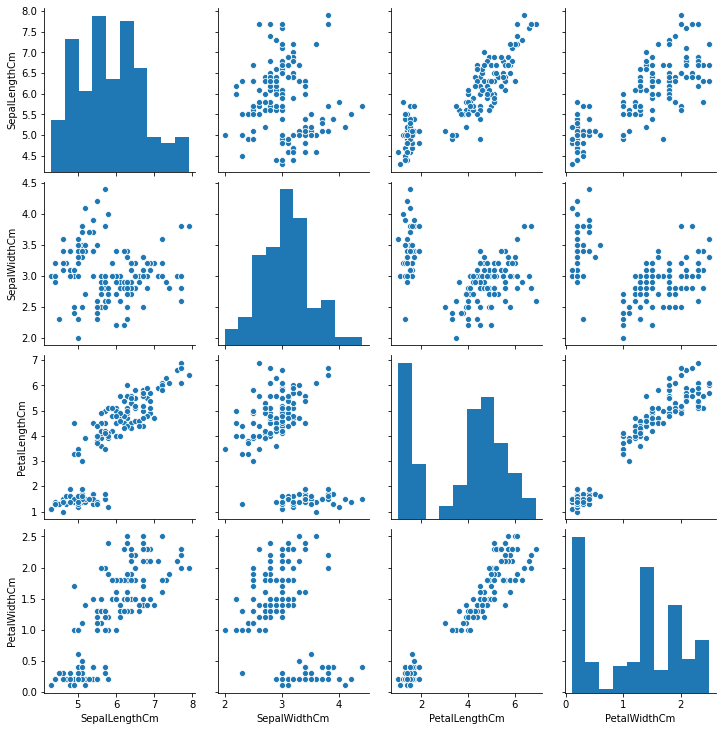

In [14]:
# Taking out some of the variables and producing the pairplot to view the correlation with target variable

variables = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
sns.pairplot(data=iris_df,x_vars= variables,y_vars=variables,)
plt.show()

__Insights from the plot:__

1. Sepal Values does not form any special kind of pattern around them, but it forms a pattern with both of the Petal values.
2. Petal Values forms a unique pattern with their values as well as with the Sepal distribution also
   
   
___Heat Map:___

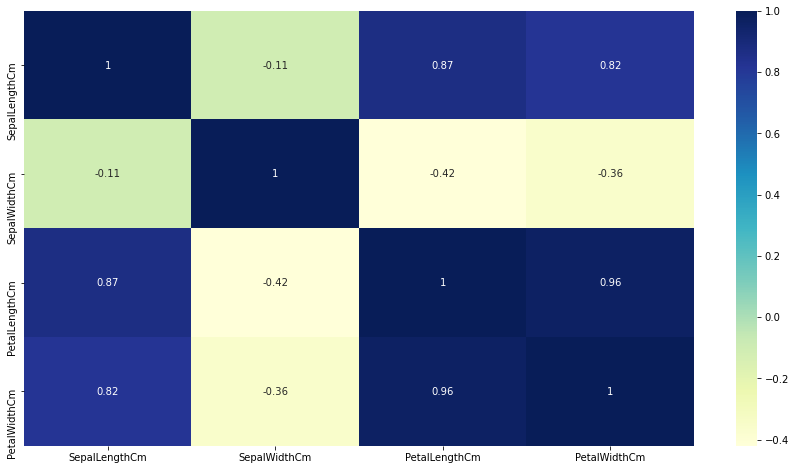

In [15]:
# Plotting the heatmap with the DF correlation so as to understand the data more specifically

plt.figure(figsize = (15,8))
sns.heatmap(iris_df[variables].corr(),annot=True,cmap='YlGnBu')
plt.show()

__Insights from the plot:__

1. Both of the Petal Values are highly correlated in a positive sign.
2. Followed by that, Sepal Length forms a high correlation with Sepal Variables.
3. But Sepal Width forms a weak and negatively correlated with all the three variables available  

## Clustering Tendency - Hopkins Test

Hopkins Test is used to test the cluster tendency if clustering is relevant in our dataset. It check if observations are randomly distributed in the space or not.

Hopkins Statistics can be defined as follows:


$$ H =   \displaystyle \Bigg[\frac{\sum \limits _{i=1} ^{n} y_{i}} {\sum \limits _{i=1} ^{n} x_{i} + \sum \limits _{i=1} ^{n} y_{i}}\Bigg]$$

yi - nearest neighbour distances from uniformly generated sample points to sample data from given dataset

xi - nearest neighbour distances within sample data from given dataset

It is defined as the sum of nearest neighbor distances from same cluster per sum of both nearest neighbor distances of same and different cluster respectively 

If H < 0.5, then it is unlikely that dataset has statistically significant clusters.

If the value of Hopkins statistic is close to 1, then we can conclude that the dataset is significantly a clusterable data.

In [16]:
# Importing libraries for performing Hopkins Statistics

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
    
# Defining the Hopkins Test Statistics
def hopkins(X):
    dimension = X.shape[1] # Dimension
    number = len(X) # Rows
    m_value = int(0.1 * number) 
    numbers = NearestNeighbors(n_neighbors=1).fit(X.values) # Fitting using Nearest Neighbors Algo
    random_X = sample(range(0, number, 1), m_value) # Generating the  range
    ujd_list = [] # y element list
    wjd_list = [] # x element list
    
    # Looping the elements/data points
    for j in range(0, m_value):
        # Getting the y distance
        u_distance, _ = numbers.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),dimension).reshape(1, -1), 2, return_distance=True)
        ujd_list.append(u_distance[0][1])
        
        # Getting the x distance
        w_distance, _ = numbers.kneighbors(X.iloc[random_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd_list.append(w_distance[0][1])
     
    # Applying the Hopkins formula
    H = sum(ujd_list) / (sum(ujd_list) + sum(wjd_list))
    
    # If H value is not a number, then it would print the result with H = 0
    if isnan(H):
        print(ujd_list, wjd_list)
        H = 0
 
    return H

Hopkins Function will determine the Cluster Tendency score by passing the DataFrame

In [17]:
# Passing the DF in Hopkins function in order to determine the possibility

print('Hopkins Test Statistics value of Raw Original data is',hopkins(iris_df.iloc[:,:-1]))


Hopkins Test Statistics value of Raw Original data is 0.8394048054559773


Since the Hopkins Test values are greater than 0.5 and close to 1, we are concluding dataframe is capable of forming the good clusters 

# MODEL EVALUATION

## Determining The Optimal Number Of Clusters

The direct methods and statistical testing methods:

1. Direct methods: 
      The corresponding methods that we have here named Elbow and Silhouette methods, respectively.
      
      
2. Statistical testing methods: 
      Consists of comparing evidence against null hypothesis. An example is the gap statistic testing method.
        
Here we are going with Direct Methods, as it is easy to interpret and analysis the values

## Elbow Curve Method

The elbow method runs k-means clustering on the dataset for a range of values for k and then for each value of k computes an average score for all clusters.

In [18]:
# Importing the KMeans library
from sklearn.cluster import KMeans

X =iris_df.iloc[:,:-1]

# Cluster range from 0 to 10
cluster_range = range( 1, 11)
cluster_errors_list = []

# Looping the cluster for every cluster range in K Means
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)                                    # Fitting the DF
    cluster_errors_list.append( clusters.inertia_ )    # Appending the inertia

# Gathered the cluster_range and cluster_errors into a DF 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors_list} )
clusters_df

,num_clusters,cluster_errors
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.930963
6,7,34.189205
7,8,29.905374
8,9,27.766907
9,10,25.945040


Cluster with the respective errors are gathered above

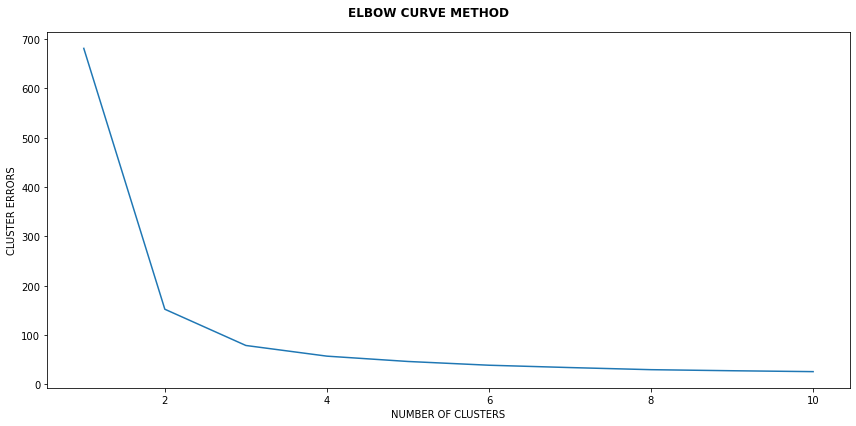

In [19]:
# Plotting the above cluster into a line graph

plt.figure(figsize=(12,6))
plot=sns.lineplot(clusters_df.num_clusters,clusters_df.cluster_errors,markers=True)
plt.suptitle("elbow curve method".upper(),weight="bold")
plot.set_xlabel('Number of Clusters'.upper())
plot.set_ylabel('Cluster Errors'.upper())
plt.tight_layout()
plt.show()

From the above Elbow method, ___K = 3___ seems to be good option since the curve gets the considerable amount of change after that point

___Technical Aspect___:
    While looking into the Squared Sum of Distances plot, the Cluster Errors are getting reduced once after the n = 2. But as it increases, after n = 3 it does not seem to have a really noteable significant in the change of the cluster errors which is what we need.

# Model Building

## K - Means Clustering Algorithm 

K Means is an iterative algorithm meaning that we repeat multiple steps making progress each time. 
The approach K-Means follows to solve the problem is called _Expectation-Maximization._ The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

There are five steps to remember when applying k-means:
1. Assign a value for k which is the number of clusters
2. Randomly assign k centroids
3. Assign each data point to its closest centroid
4. Calculate the new cluster means and update the centroids
5. Repeat steps 3 and 4 until convergence

### Model Building

Building the model with ___K = 3___ with the ___iteration of 10___ and ___random seed of 100___ to see the efficiency 

In [20]:
# Building the model using K =3

model_clus3_iter2 = KMeans(n_clusters = 3, max_iter=10,random_state = 100)
model_clus3_iter2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [21]:
# Concatenating the predicted cluster label with the original DF

k_means = X
k_means.index = pd.RangeIndex(len(k_means.index))
kmeans_3 = pd.concat([k_means, pd.Series(model_clus3_iter2.labels_).astype(int)], axis=1)

# Giving the columns name
kmeans_3.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Cluster_Id']
kmeans_3.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Cluster_Id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We have just created the Cluster Id and going to merge with the original DF

In [22]:
# Removing the scaled Data and shows the original data with Cluster labels

merge_kmeans_3=pd.merge(iris_df.reset_index(),kmeans_3,left_index=True,right_index=True )

# Dropping the columns
merge_kmeans_3=merge_kmeans_3.drop(['index','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis=1)
merge_kmeans_3.head()

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth,Cluster_Id
0,Iris-setosa,5.1,3.5,1.4,0.2,1
1,Iris-setosa,4.9,3.0,1.4,0.2,1
2,Iris-setosa,4.7,3.2,1.3,0.2,1
3,Iris-setosa,4.6,3.1,1.5,0.2,1
4,Iris-setosa,5.0,3.6,1.4,0.2,1


Unnecessary columns and the scaled values have been removed in order to decide the cluster

In [23]:
# Evaluating the number of elements in the clusters

merge_kmeans_3.Cluster_Id.value_counts()

2    62
1    50
0    38
Name: Cluster_Id, dtype: int64

___Cluster Formation:___

Have Created a function to see the pattern of clusters formed in a subplot to distinguish them

In [24]:
def biscatter( column1, column2, xlabel,ylabel):
    
    fig = plt.figure(figsize=(15,5))
    
    fig.suptitle(xlabel.upper()+' vs '+ylabel.upper(),fontweight="bold")
    
    # Plotting the scatter plot with appropriate parameter use
    plt.subplot(1, 2, 1)
    plot = sns.scatterplot(data=merge_kmeans_3, x=column1,y=column2,palette='cool',hue="Cluster_Id")
    plot.set_xlabel(xlabel.upper())
    plot.set_ylabel(ylabel.upper())
    
    plt.subplot(1, 2, 2)
    plot = sns.scatterplot(data=merge_kmeans_3, x=column1,y=column2,palette='cool',hue="Species")
    plot.set_xlabel(xlabel.upper())
    plot.set_ylabel(ylabel.upper())
    
    plt.tight_layout()
    plt.show()

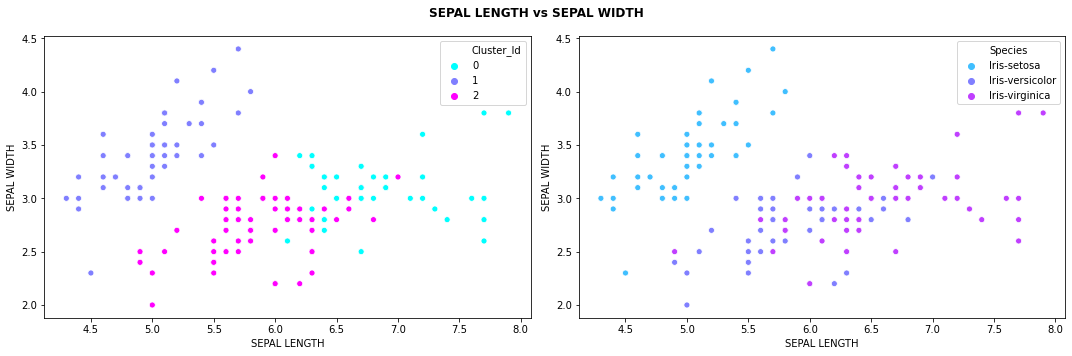

In [25]:
# Passing the value with the function to get scatter plot

biscatter(column1='SepalLength',column2='SepalWidth',xlabel='Sepal Length',ylabel='Sepal Width')

__Insights from the plot:__

1. Clusters formed with the original and produced using K-Means have slight different
2. Though the differences are minimal, we can say our model performance is above optimal level


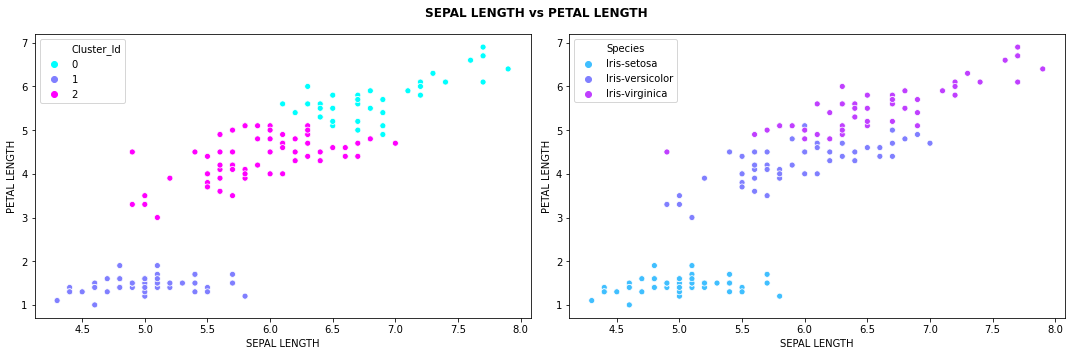

In [26]:
# Passing the value with the function to get scatter plot

biscatter(column1='SepalLength',column2='PetalLength',xlabel='Sepal Length',ylabel='Petal Length')

__Insights from the plot:__

1. Clusters formed with the original and produced using K-Means have 95% similiarities
2. Though the differences are minimal, we can say our model performance is above optimal level